<a href="https://colab.research.google.com/github/marcin119a/SAD/blob/main/Estymator_g%C4%99sto%C5%9Bci_rozk%C5%82ad%C3%B3w.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def gaussian_kernel(x):
    return (1/np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)


In [ ]:
import pandas as pd

tips = pd.read_csv('https://raw.githubusercontent.com/marcin119a/PUMP2/main/tips.csv')

In [ ]:
data = tips['total_bill'].to_numpy()

In [ ]:
def kde(x, data, bandwidth):
    n = len(data)
    return np.sum(gaussian_kernel((x - data[:, np.newaxis]) / bandwidth), axis=0) / (n * bandwidth)


In [ ]:
# Obliczanie odległości międzykwartylowej (IQR)
q25, q75 = np.percentile(data, [25, 75])
iqr = q75 - q25

# Obliczanie szerokości przedziału zgodnie z regułą Freedmana-Diaconisa
n = len(data)
bin_width = int(2 * iqr * n ** (-1/3))

In [ ]:
# Obliczanie odległości międzykwartylowej (IQR)
q25, q75 = np.percentile(data, [25, 75])
iqr = q75 - q25

# Obliczanie szerokości przedziału zgodnie z regułą Freedmana-Diaconisa
n = len(data)
bin_width = 2 * iqr * n ** (-1/3)

# Obliczanie liczby bins
bins = int((np.max(data) - np.min(data)) / bin_width)
print(f"Liczba bins zgodnie z regułą Freedmana-Diaconisa: {bins}")

Liczba bins zgodnie z regułą Freedmana-Diaconisa: 13


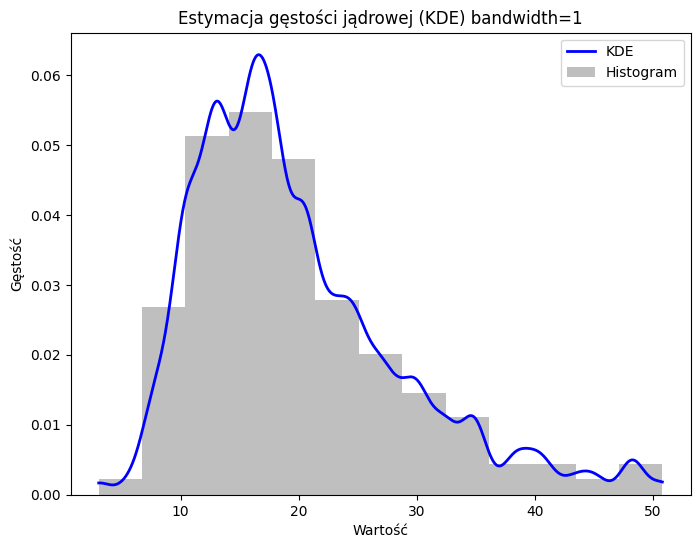

In [ ]:

# Wybór parametrów
bandwidth = 1  # Parametr wygładzenia
x_grid = np.linspace(data.min(), data.max(), 1000)  # Punkty, na których obliczamy gęstość

# Obliczenie KDE
density = kde(x_grid, data, bandwidth)

# Rysowanie wykresu
plt.figure(figsize=(8, 6))
plt.plot(x_grid, density, color='blue', lw=2, label='KDE')
plt.hist(data, bins=bins, density=True, alpha=0.5, color='gray', label='Histogram')
plt.title('Estymacja gęstości jądrowej (KDE) bandwidth=1')
plt.xlabel('Wartość')
plt.ylabel('Gęstość')
plt.legend()
plt.show()


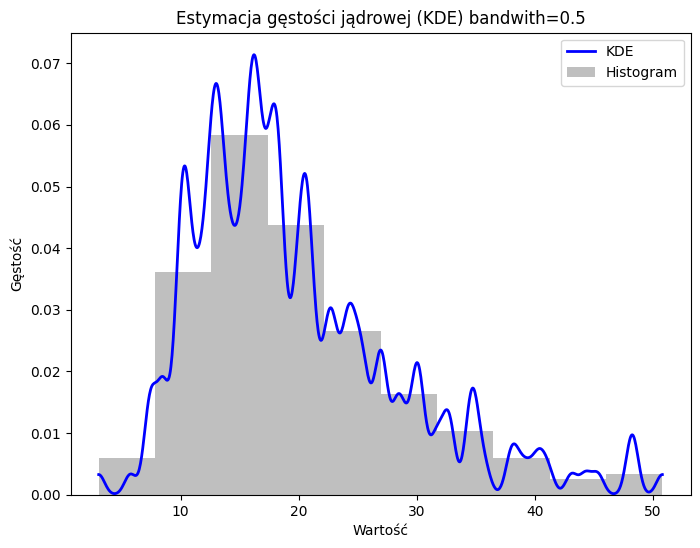

In [ ]:

# Wybór parametrów
bandwidth = 0.5  # Parametr wygładzenia
x_grid = np.linspace(data.min(), data.max(), 1000)  # Punkty, na których obliczamy gęstość

# Obliczenie KDE
density = kde(x_grid, data, bandwidth)

# Rysowanie wykresu
plt.figure(figsize=(8, 6))
plt.plot(x_grid, density, color='blue', lw=2, label='KDE')
plt.hist(data, bins=10, density=True, alpha=0.5, color='gray', label='Histogram')
plt.title('Estymacja gęstości jądrowej (KDE) bandwith=0.5')
plt.xlabel('Wartość')
plt.ylabel('Gęstość')
plt.legend()
plt.show()


In [ ]:
density = kde(x_grid, data, bandwidth)

In [ ]:
def monte_carlo_sample(kde_func, x_grid, n_samples=1000):
    # Normalizacja gęstości, aby była rozkładem prawdopodobieństwa
    normalized_density = kde_func / np.sum(kde_func)

    # Losowanie próbek z x_grid na podstawie estymowanej gęstości
    samples = np.random.choice(x_grid, size=n_samples, p=normalized_density)
    return samples

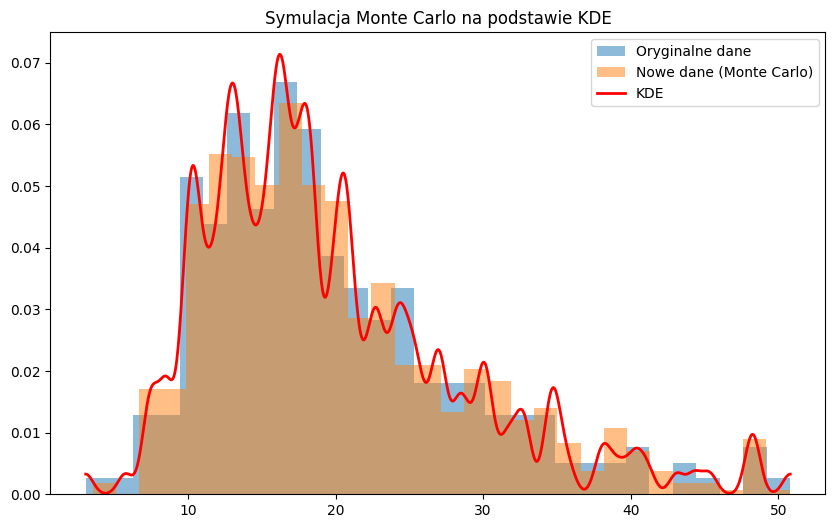

In [ ]:
# Generowanie nowych próbek
new_samples = monte_carlo_sample(density, x_grid, n_samples=1000)

# Wizualizacja nowych próbek w porównaniu do oryginalnych danych
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, label='Oryginalne dane')
plt.hist(new_samples, bins=30, density=True, alpha=0.5, label='Nowe dane (Monte Carlo)')
plt.plot(x_grid, density, color='red', lw=2, label='KDE')
plt.title("Symulacja Monte Carlo na podstawie KDE")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Generowanie przykładowych danych z rozkładu normalnego
np.random.seed(0)
data = np.concatenate([np.random.normal(0, 1, 100), np.random.normal(5, 1, 20)])

# Dodanie kilku anomalii
data = np.concatenate([data, [8, 9, 10, 15]])


In [ ]:
# Dopasowanie modelu KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data[:, None])

# Obliczanie log-gęstości dla każdego punktu
log_density = kde.score_samples(data[:, None])
density = np.exp(log_density)

# Zdefiniowanie progu dla wykrywania anomalii (np. 5 percentyl)
threshold = np.percentile(density, 5)

# Wykrywanie anomalii (gęstość poniżej progu)
anomalies = data[density < threshold]
print("Anomalie:", anomalies)


Anomalie: [-2.55298982  3.65224094  3.729515    8.          9.         10.
 15.        ]


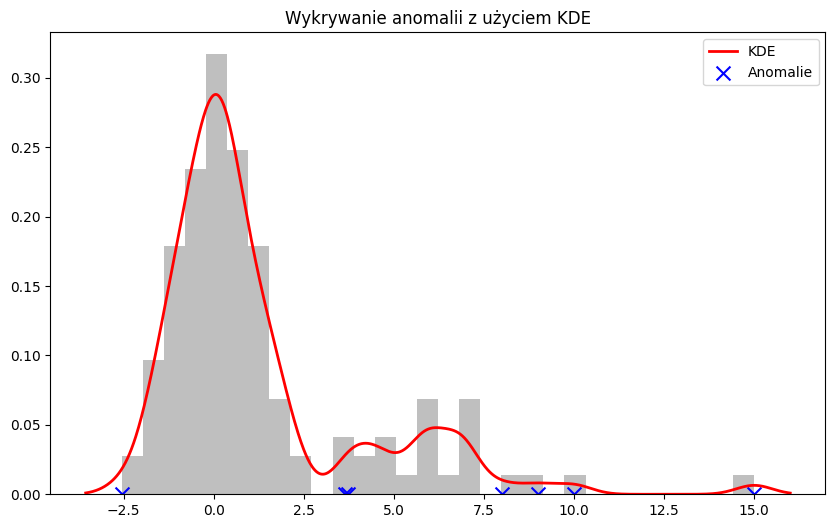

In [ ]:
# Rysowanie histogramu oraz estymowanej gęstości KDE
x_grid = np.linspace(min(data) - 1, max(data) + 1, 1000)
kde_density = np.exp(kde.score_samples(x_grid[:, None]))

plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, color='gray')
plt.plot(x_grid, kde_density, color='red', lw=2, label='KDE')
plt.scatter(anomalies, np.zeros_like(anomalies), color='blue', marker='x', s=100, label='Anomalie')
plt.title("Wykrywanie anomalii z użyciem KDE")
plt.legend()
plt.show()


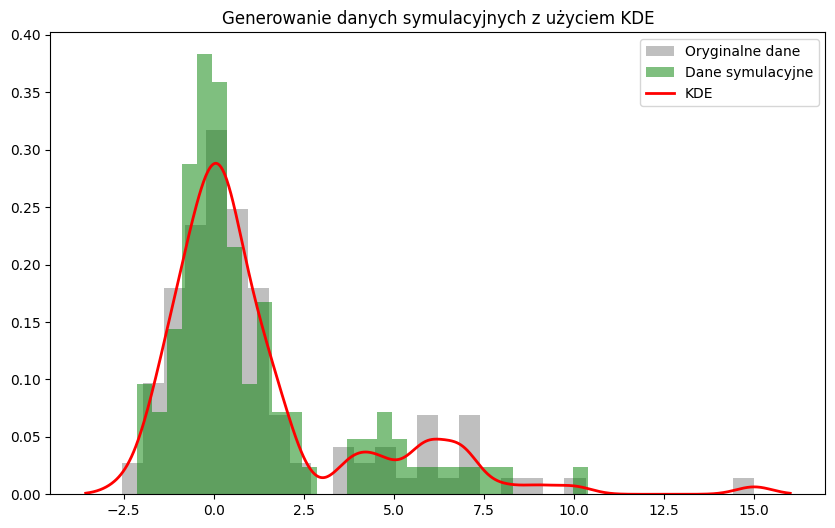

In [ ]:
# Generowanie nowych danych symulacyjnych na podstawie modelu KDE
new_samples = kde.sample(n_samples=100, random_state=42).flatten()

# Wizualizacja nowych danych na tle oryginalnych
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, color='gray', label='Oryginalne dane')
plt.hist(new_samples, bins=30, density=True, alpha=0.5, color='green', label='Dane symulacyjne')
plt.plot(x_grid, kde_density, color='red', lw=2, label='KDE')
plt.title("Generowanie danych symulacyjnych z użyciem KDE")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Generowanie danych dla dwóch klas
np.random.seed(0)
class_1 = np.random.normal(loc=0, scale=1, size=100)
class_2 = np.random.normal(loc=5, scale=1, size=100)

# Nowe dane do klasyfikacji
new_data = np.array([2, 4, 6])


In [ ]:
# Dopasowanie KDE dla obu klas
kde_class_1 = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(class_1[:, np.newaxis])
kde_class_2 = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(class_2[:, np.newaxis])

# Estymowanie gęstości log dla nowych danych
log_density_class_1 = kde_class_1.score_samples(new_data[:, np.newaxis])
log_density_class_2 = kde_class_2.score_samples(new_data[:, np.newaxis])

# Obliczanie posterior (tu: zakładamy równe prior)
posterior_class_1 = np.exp(log_density_class_1)
posterior_class_2 = np.exp(log_density_class_2)

# Normalizacja posteriorów
posterior_sum = posterior_class_1 + posterior_class_2
posterior_class_1 /= posterior_sum
posterior_class_2 /= posterior_sum

# Wyświetlenie wyników
for i, (d, p1, p2) in enumerate(zip(new_data, posterior_class_1, posterior_class_2)):
    print(f"Dane: {d}, Posterior klasy 1: {p1:.3f}, Posterior klasy 2: {p2:.3f}")


Dane: 2, Posterior klasy 1: 0.969, Posterior klasy 2: 0.031
Dane: 4, Posterior klasy 1: 0.000, Posterior klasy 2: 1.000
Dane: 6, Posterior klasy 1: 0.000, Posterior klasy 2: 1.000


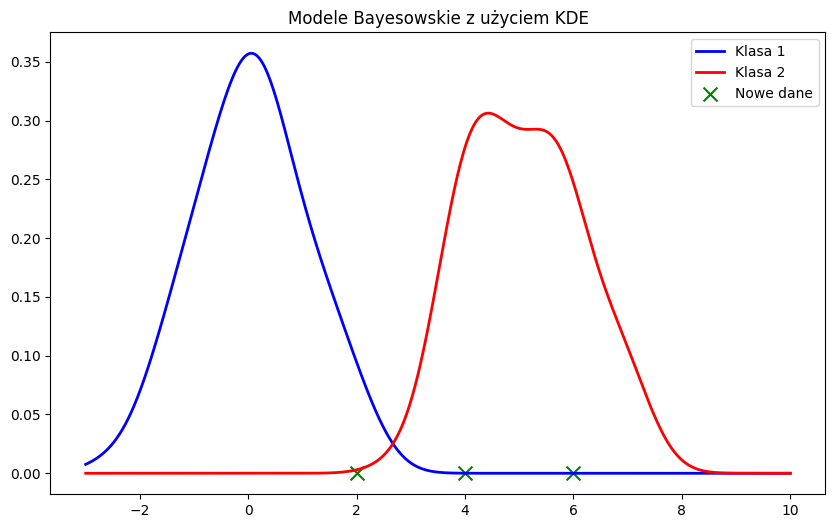

In [ ]:
x_grid = np.linspace(-3, 10, 1000)
kde_density_class_1 = np.exp(kde_class_1.score_samples(x_grid[:, None]))
kde_density_class_2 = np.exp(kde_class_2.score_samples(x_grid[:, None]))

plt.figure(figsize=(10, 6))
plt.plot(x_grid, kde_density_class_1, color='blue', lw=2, label='Klasa 1')
plt.plot(x_grid, kde_density_class_2, color='red', lw=2, label='Klasa 2')
plt.scatter(new_data, np.zeros_like(new_data), color='green', marker='x', s=100, label='Nowe dane')
plt.title("Modele Bayesowskie z użyciem KDE")
plt.legend()
plt.show()


In [ ]:
# Parametr bandwidth
bandwidth = 0.5

# Zakres wartości dla estymacji gęstości
x_grid = np.linspace(data.min(), data.max(), 1000)

# Estymacja gęstości
density = kde(x_grid, data, bandwidth)


TypeError: 'KernelDensity' object is not callable

In [ ]:
# Obliczenie gęstości dla punktów w zbiorze danych
data_density = kde(data, data, bandwidth)

# Ustalanie progu dla anomalii (np. 5 percentyl)
threshold = np.percentile(data_density, 5)

# Wykrywanie anomalii
anomalies = data[data_density < threshold]
print("Anomalie:", anomalies)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_grid, density, color='red', lw=2, label='KDE')
plt.hist(data, bins=30, density=True, alpha=0.5, color='gray', label='Histogram')
plt.scatter(anomalies, np.zeros_like(anomalies), color='blue', marker='x', s=100, label='Anomalie')
plt.title("Wykrywanie anomalii z użyciem KDE")
plt.legend()
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv('https://github.com/marcin119a/SAD/blob/main/Salary_Data.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 41, saw 23


In [ ]:
df.head()

### Imputacja danych